In [18]:
import numpy as np
import pandas as pd
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
dataset = pd.read_csv("https://raw.githubusercontent.com/anujvyas/Diabetes-Prediction-Deployment/master/kaggle_diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [24]:
dataset.shape

(2000, 9)

In [25]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Data Visualization

Text(0.5, 1.0, 'Diabetes Patient')

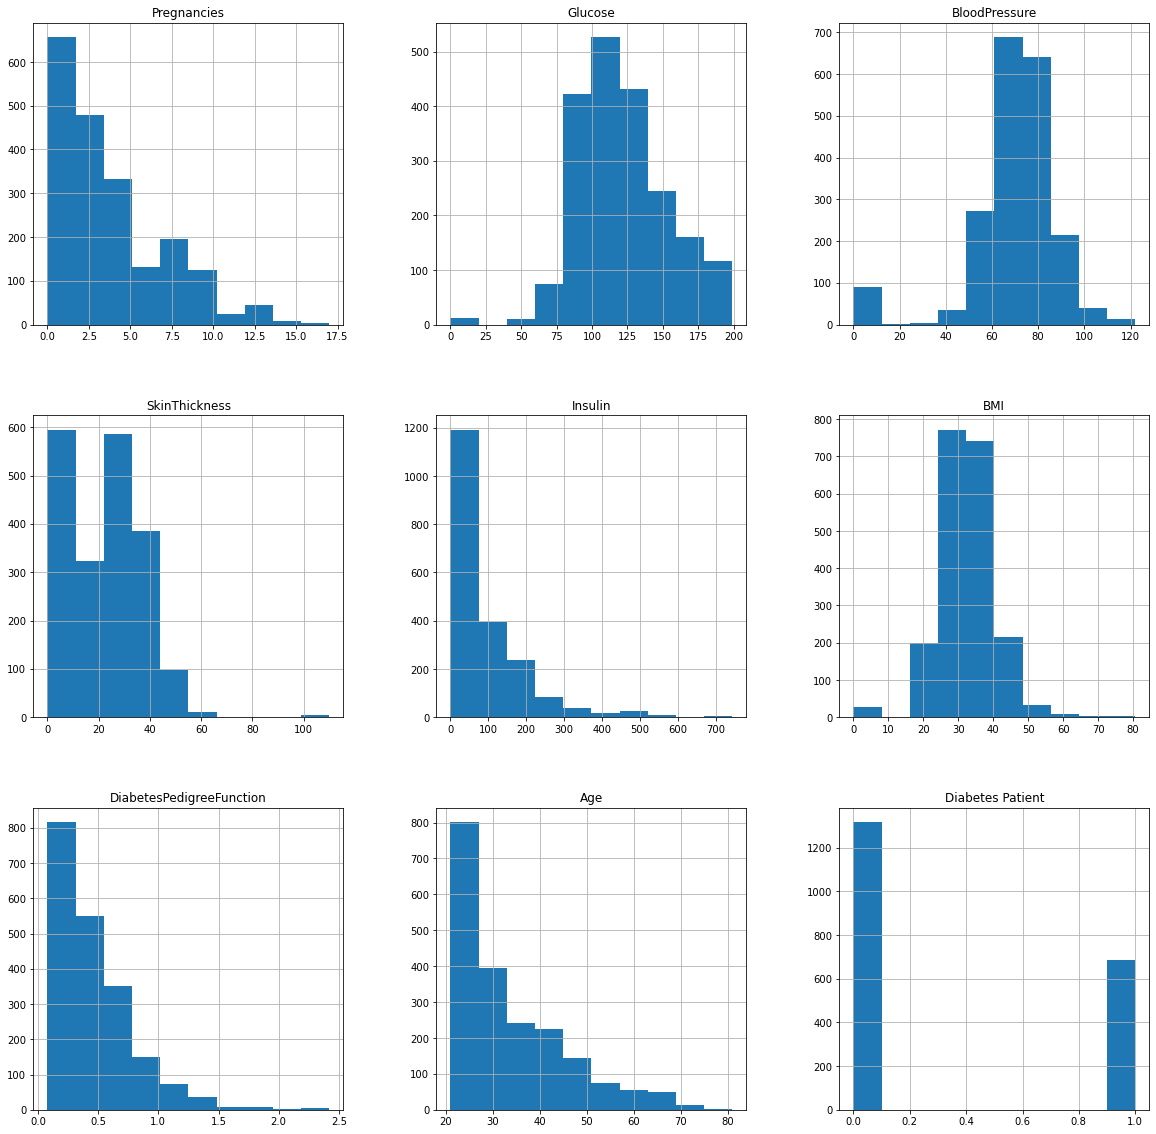

In [27]:
p = dataset.hist(figsize = (20,20))
pyplot.title('Diabetes Patient')

<AxesSubplot:>

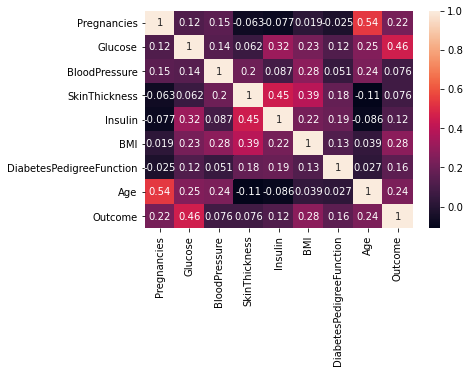

In [28]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

In [44]:
def get_zerocolumns(feature):
    if 0 in dataset[feature]:
        return feature

In [45]:
for feature in dataset.columns:
    zero_columns=get_zerocolumns(feature)
    print(zero_columns)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [49]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [50]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [51]:
def impute_mean(feature):
    dataset[feature].fillna(dataset[feature].mean(),inplace=True)

In [52]:
def impute_median(feature):
    dataset[feature].fillna(dataset[feature].median(),inplace=True)

In [48]:
# Replacing NaN value by mean, median depending upon distribution
dataset['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
dataset['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
dataset['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
dataset['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
dataset['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [53]:
for feature in ['Glucose','BloodPressure']:
    impute_mean(feature)

In [54]:
for feature in ['SkinThickness','Insulin','BMI']:
    impute_median(feature)

In [55]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [56]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state=7)
X_train.shape,Y_train.shape

((1600, 8), (1600,))

In [59]:
# spot check some algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC',RandomForestClassifier()))
models.append(('SVM', SVC()))

In [60]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X_train,Y_train,scoring='accuracy',cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.762500 (0.032596)
LDA: 0.756875 (0.030033)
KNN: 0.785625 (0.015575)
CART: 0.961250 (0.011456)
NB: 0.743125 (0.023626)
RFC: 0.961250 (0.019725)
SVM: 0.764375 (0.030497)


In [63]:
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(("ScaledLDA",Pipeline([('Scaler',StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(("ScaledKNN",Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(("ScaledCART",Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(("ScaledNB",Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
pipelines.append(("ScaledRFC",Pipeline([('Scaler',StandardScaler()),('RFC',RandomForestClassifier())])))
pipelines.append(("ScaledSVM",Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])))

In [64]:
results = []
names = []
for name,model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X_train,Y_train,scoring='accuracy',cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    

ScaledLR: 0.763125 (0.026435)
ScaledLDA: 0.756875 (0.030033)
ScaledKNN: 0.783125 (0.029188)
ScaledCART: 0.961250 (0.008292)
ScaledNB: 0.743125 (0.023626)
ScaledRFC: 0.963750 (0.022500)
ScaledSVM: 0.816875 (0.032482)


RandomForest and DecisionTree are giving best Accuracy hence, chance of overfitting . 
KNN is with decent Accuracy.

In [78]:
#KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       273
           1       0.64      0.69      0.66       127

    accuracy                           0.78       400
   macro avg       0.74      0.75      0.75       400
weighted avg       0.78      0.78      0.78       400



[[223  50]
 [ 39  88]]


<AxesSubplot:>

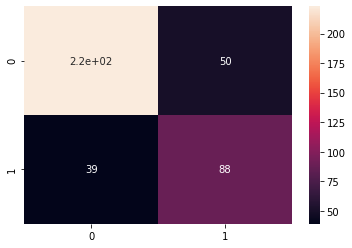

In [80]:
print(confusion_matrix(Y_test,y_pred))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

In [77]:
#SVC Algorithm
mod = SVC()
mod.fit(X_train,Y_train)
ysvc_pred = mod.predict(X_test)
print(classification_report(Y_test,ysvc_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       273
           1       0.67      0.55      0.61       127

    accuracy                           0.77       400
   macro avg       0.74      0.71      0.72       400
weighted avg       0.76      0.77      0.77       400



[[239  34]
 [ 57  70]]


<AxesSubplot:>

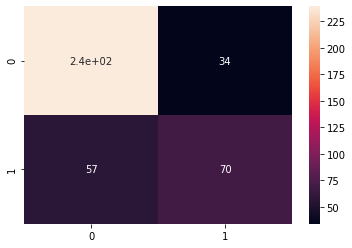

In [81]:
print(confusion_matrix(Y_test,ysvc_pred))
sns.heatmap(confusion_matrix(Y_test,ysvc_pred),annot=True)

Both the models are giving almost Same Accuracy . Hence, going with KNN

In [84]:
# Creating a pickle file for the classifier
import pickle
filename = 'diabetes-prediction-knn-model.pkl'
pickle.dump(knn, open(filename, 'wb'))